# Differential Forms <img height="60" src="logo/logo_DF-PNG.png" width="60"/>

### Import

In [1]:
import matplotlib
import numpy as np
import seaborn as sns

from differentialforms.Canvas import DrawingCanvas
from differentialforms.Phasor import Phasor, Pintograph
from utils import timeline

matplotlib.use('TkAgg')
%matplotlib inline

np.set_printoptions(suppress=True)
sns.set_theme()

## Drawings

In [47]:
tmax = 300  # to include last tmax as last value
dt = 0.01

pi = np.pi
tim = timeline(t_max=tmax, dt=dt)
u = tim / tmax

How to plot multiple curves:
- draw your curve as usual (kee in mind that when you do .rotate() you modify the starting curve, so if you want to rotate the same one multiple times you have to create it as many times)
- add each curve to a DrawingCanvas (you can either add a list of curve or a single curve)
- call DrawingCanvas.plot() where you can specify the colour of each curve, it can be either a RGB one (e.g. [1,0,0] for red) or matplotlib colours ("r"). For more details see [matplotlib docs](https://matplotlib.org/stable/tutorials/colors/colors.html)

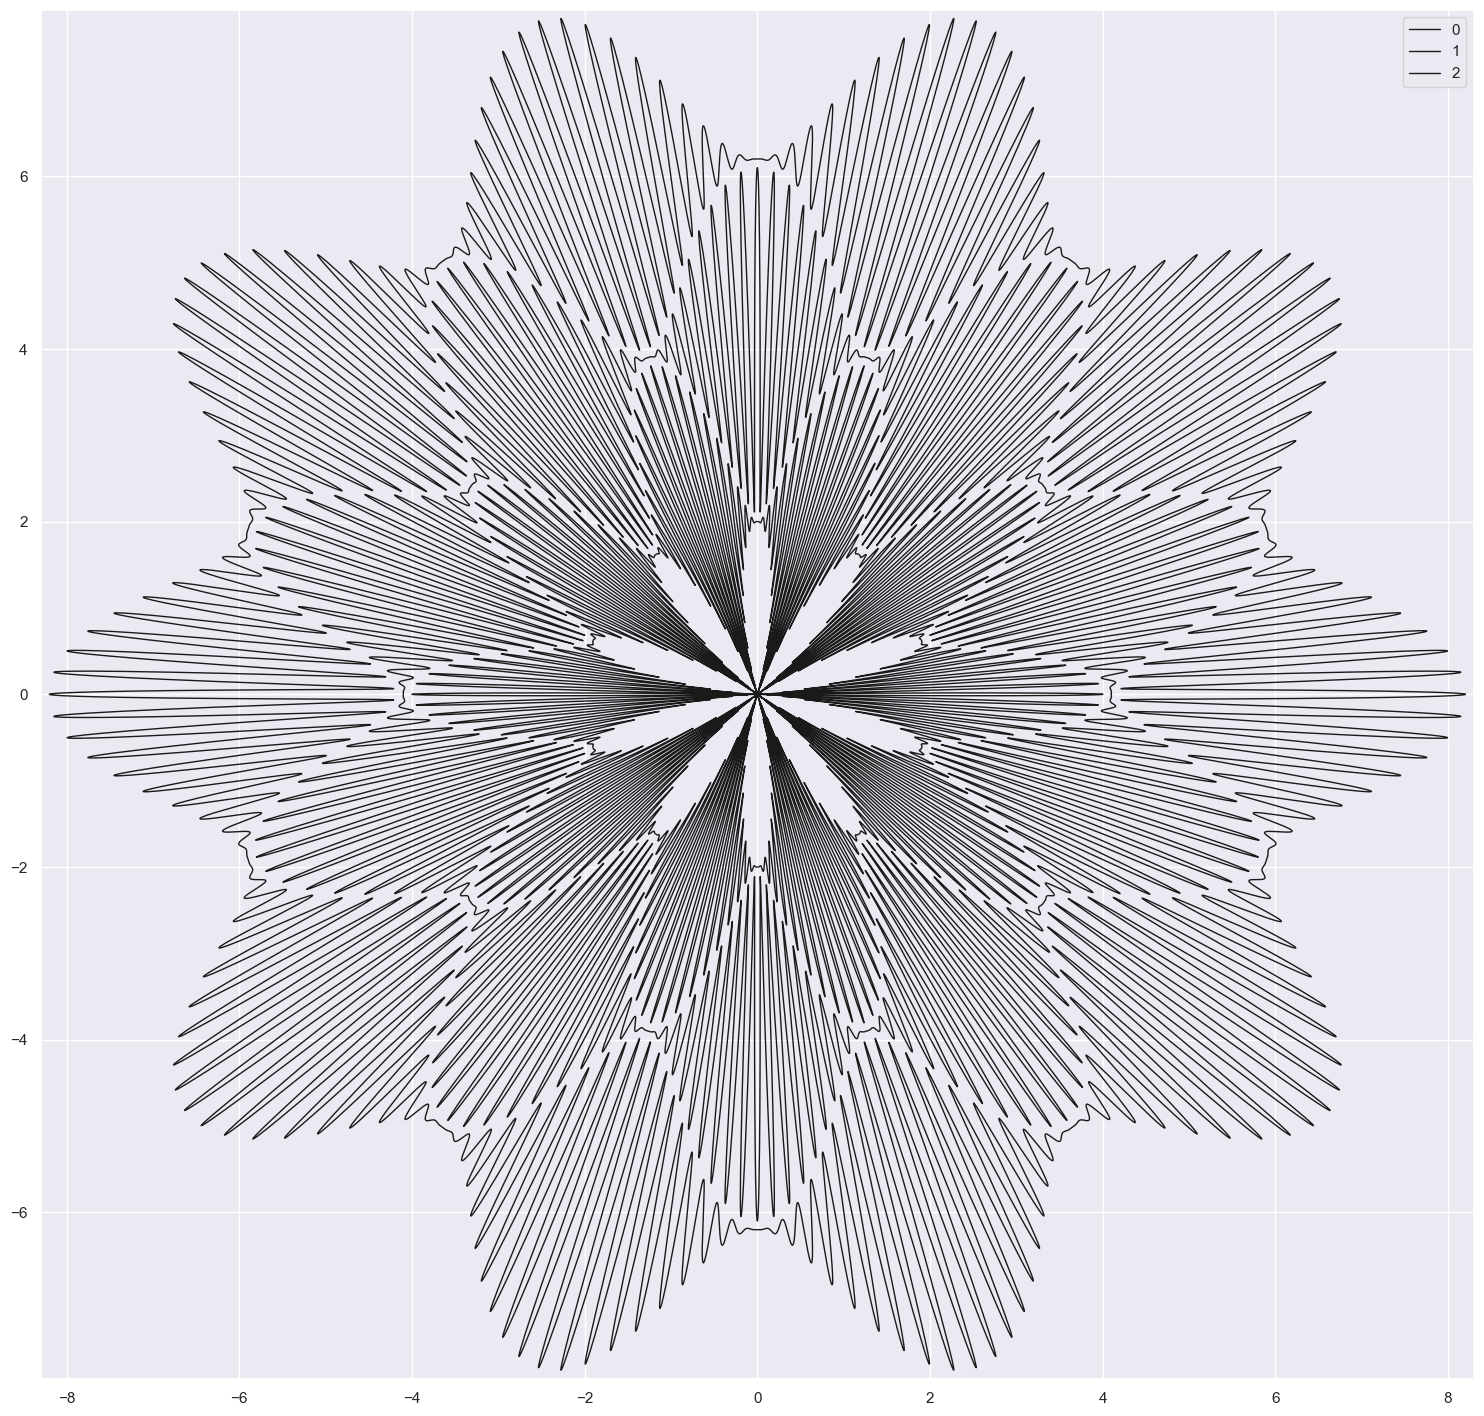

In [4]:
r1 = 4.1
r2 = np.sin(10*pi*u)**2
period = tmax

curve = Phasor(time=tim, x_cent=0, y_cent=0, radius=r1, period=period, phase=0)
curve2 = Phasor(time=tim, x_cent=curve.x, y_cent=curve.y, radius=r2, period=1, phase=2*pi*u)
curve3 = Phasor(time=tim, x_cent=curve2.x, y_cent=curve2.y, radius=r2, period=-1, phase=2*pi*u)

r3 = 1 - r2
curve4 = Phasor(time=tim, x_cent=0, y_cent=0, radius=6.2, period=period, phase=0)
curve5 = Phasor(time=tim, x_cent=curve4.x, y_cent=curve4.y, radius=r3, period=1, phase=2*pi*u)
curve6 = Phasor(time=tim, x_cent=curve5.x, y_cent=curve5.y, radius=r3, period=-1, phase=2*pi*u)

r4 = 1 - r2
curve7 = Phasor(time=tim, x_cent=0, y_cent=0, radius=2, period=period, phase=0)
curve8 = Phasor(time=tim, x_cent=curve7.x, y_cent=curve7.y, radius=r4, period=1, phase=2*pi*u)
curve9 = Phasor(time=tim, x_cent=curve8.x, y_cent=curve8.y, radius=r4, period=-1, phase=2*pi*u)

canv = DrawingCanvas().add([curve3, curve6, curve9])
canv.plot(linecolor=["k", "k", "k"], save=True, legend=True, logo=True)

In [5]:
# pinto = Pintograph(curve1=curve, curve2=curve2, arm1=6.2, arm2=6.2, extension=0).rotate(4.5, 2.5, tmax, 0)
# pinto1 = Pintograph(curve1=pinto, curve2=curve2, arm1=6.2, arm2=6.2, extension=0).rotate(4.5, 2.5, tmax, 0.3)
# pinto2 = Pintograph(curve1=curve, curve2=curve2, arm1=6.2, arm2=6.2, extension=0).rotate(4.5, 2.5, tmax, 0.6)

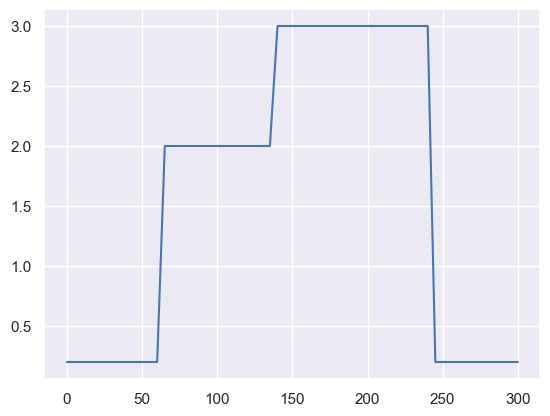

In [60]:
# Making the radious to be a piecewise linear function (periodic)

A = 0.2
B = 2
C = 3

t1 = tmax *0.2
t2 = tmax * 0.45
t3 = tmax * 0.8

T_ramp = 5



radius = np.zeros([len(tim)])

for i in range(len(tim)):
    if tim[i] <= t1:
        radius[i] = A

    if tim[i] > t1          and tim[i] <= t1 + T_ramp:
        radius[i] = (B-A)/T_ramp  * (tim[i] - t1) + A       # y = m(x-x0) + y0

    if tim[i] > t1 + T_ramp and tim[i] <= t2:
        radius[i] = B

    if tim[i] > t2          and tim[i] <= t2 + T_ramp:
        radius[i] = (C-B)/T_ramp  * (tim[i] - t2) + B

    if tim[i] > t2 + T_ramp and tim[i] <= t3:
        radius[i] = C

    if tim[i] > t3          and tim[i] <= t3 + T_ramp:
        radius[i] = (A-C)/T_ramp  * (tim[i] - t3) + C

    if tim[i] > t3 + T_ramp:
        radius[i] = A

import matplotlib.pyplot as plt
plt.plot(tim, radius)


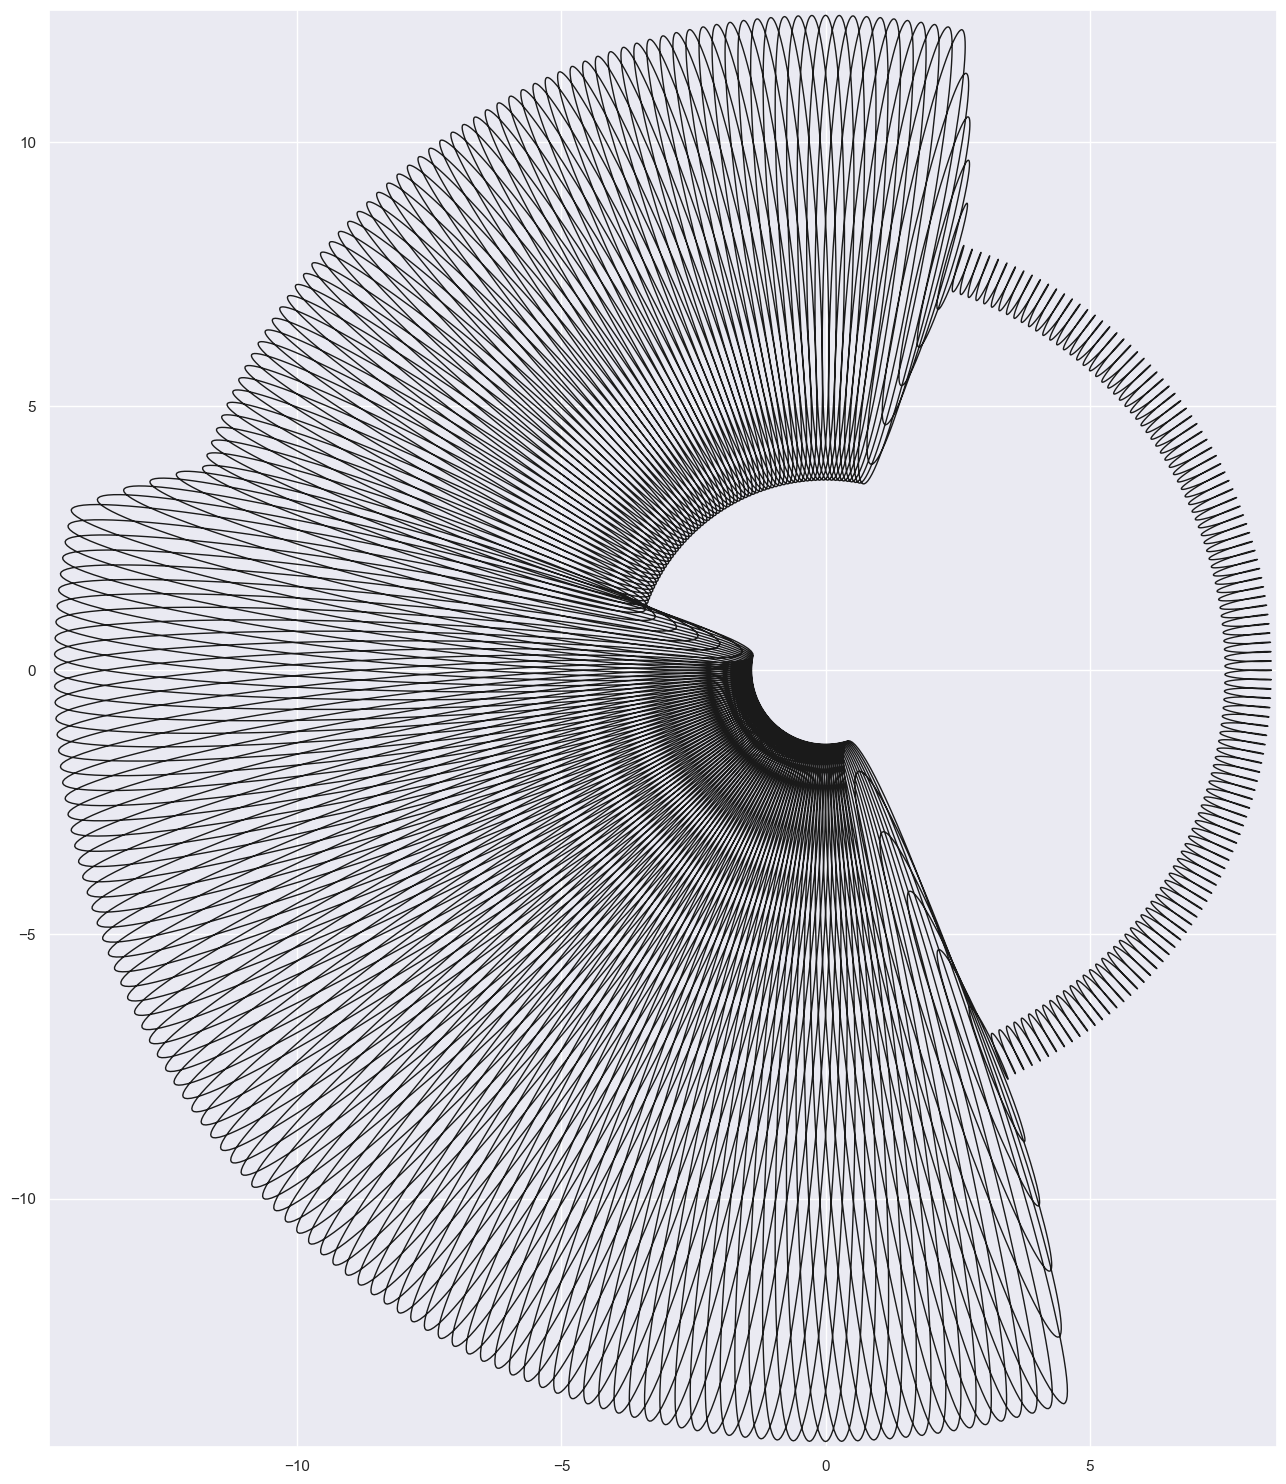

Lesgooo!


In [76]:
period = tmax
E = 1.2   # parameter definining "inverse eccentricity" E=0 -> circles, E=1 -> "sine wave"


curve = Phasor(time=tim, x_cent=0, y_cent=0, radius=8, period=period, phase=0)
curve2 = Phasor(time=tim, x_cent=curve.x, y_cent=curve.y, radius=radius, period=1, phase=2 * pi * u)
curve3 = Phasor(time=tim, x_cent=curve2.x, y_cent=curve2.y, radius= E * radius, period=-1, phase=2 * pi * u)

# r3 = 1 - r2
# curve4 = Phasor(time=tim, x_cent=0, y_cent=0, radius=6.2, period=period, phase=0)
# curve5 = Phasor(time=tim, x_cent=curve4.x, y_cent=curve4.y, radius=r3, period=1, phase=2 * pi * u)
# curve6 = Phasor(time=tim, x_cent=curve5.x, y_cent=curve5.y, radius=r3, period=-1, phase=2 * pi * u)
#
# r4 = 1 - r2
# curve7 = Phasor(time=tim, x_cent=0, y_cent=0, radius=2, period=period, phase=0)
# curve8 = Phasor(time=tim, x_cent=curve7.x, y_cent=curve7.y, radius=r4, period=1, phase=2 * pi * u)
# curve9 = Phasor(time=tim, x_cent=curve8.x, y_cent=curve8.y, radius=r4, period=-1, phase=2 * pi * u)

canv = DrawingCanvas().add([curve3])
canv.plot(linecolor=["k", "k", "k"], save=0, legend=0, logo=True)
print("Lesgooo!")